# Below is my project Breakdown

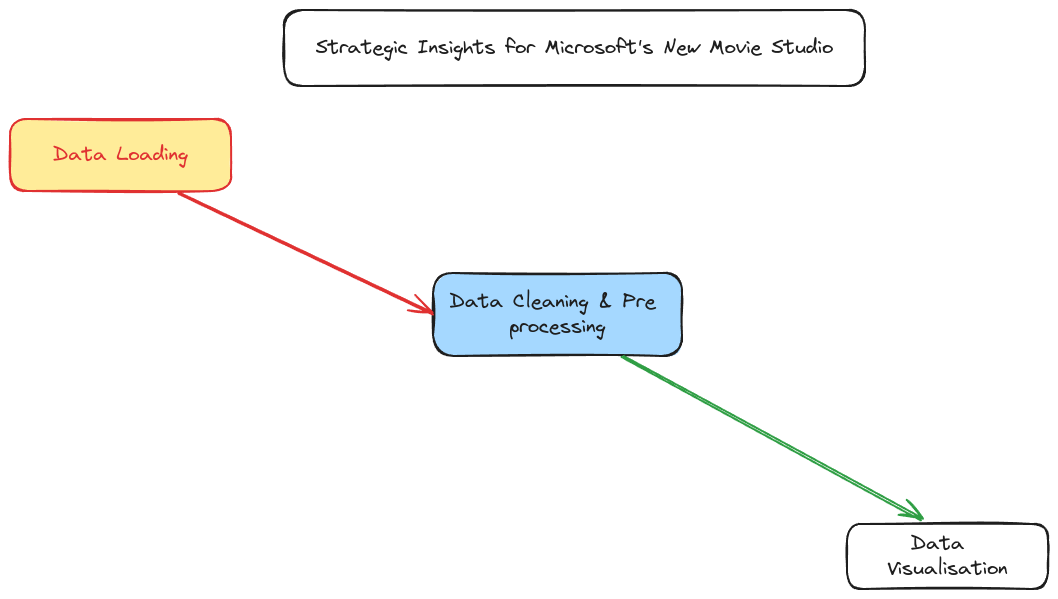

# Import all libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collections
* I will use 3 types of datasets of movies and perform exploration

# First Dataset
* this deals with gross of movies showing also the year movie was released its title studio with all gross incomes

In [4]:
#Data loading using Pandas dataframe
data=pd.read_csv('data/bom.movie_gross.csv')
#Check the first five rows of  movie dataset
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Second Dataset
* Second Data Deals with Movies reviews

In [5]:
#Load the Data and check the fist five rows of the data
reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin1')
#Check the first five rows
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


# The third  Dataset
## This one deals with Movies budget 

In [6]:
#Load the budget data and check the first five rows
budget=pd.read_csv('data/tn.movie_budgets.csv')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Fourth Dataset

In [7]:
#load the movies dataset
movies=pd.read_csv('data/tmdb.movies.csv')
#Check the head of the first five rows
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Data Cleaning and Pre Processing

* The First one to be cleaned is the one involving Movies gross

In [8]:
#Check the shape of the data to know the number of rows and columns in the data
data.shape

(3387, 5)

* The movie  data contains 5 rows and 3387 columns  

In [9]:
#Check the columns of the movie data
data.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [10]:
#Check the infor of the data to know the categorical and non categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
#Use Label encoder to be numerical
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column].astype(str))

In [12]:
#Check if the data is all numerical
data.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,3115,36,415000000.0,974,2010
1,174,36,334200000.0,1003,2010
2,1064,246,296000000.0,981,2010
3,1230,246,292600000.0,854,2010
4,2216,171,238700000.0,829,2010
5,3011,219,300500000.0,676,2010
6,1261,185,312400000.0,552,2010
7,2399,36,200800000.0,666,2010
8,673,238,251500000.0,518,2010
9,1149,171,217600000.0,489,2010


In [13]:
#CHeck the  null values of the data set
data.isnull().sum()

title              0
studio             0
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

* I have decided to drop the null values since they were very few and may have no impact on the data. This will also improve data visualization

In [14]:
#drop the null values
data.dropna(inplace=True)

In [15]:
#Check is the null values has been imputed
data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [16]:
#Check the statical Distribution of the data
data.describe()

,title,studio,domestic_gross,foreign_gross,year
count,3359.000000,3359.000000,3.359000e+03,3359.000000,3359.000000
mean,1693.991069,145.182197,2.874585e+07,828.277464,2013.968145
std,976.991527,73.186717,6.698250e+07,408.952233,2.479432
min,0.000000,0.000000,1.000000e+02,0.000000,2010.000000
25%,847.500000,89.000000,1.200000e+05,457.500000,2012.000000
50%,1696.000000,139.000000,1.400000e+06,984.000000,2014.000000
75%,2540.000000,215.000000,2.790000e+07,1204.000000,2016.000000
max,3385.000000,257.000000,9.367000e+08,1204.000000,2018.000000


In [17]:
#Check the duplicates
data.duplicated().sum()

0

In [18]:
#Check the the outliers in the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Determine outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
# Print message if there are outliers
for column in outliers.index:
    if outliers[column] > 0:
        print(f'{column} has {outliers[column]} outliers')


domestic_gross has 406 outliers


In [20]:
#Below is the code to remove the ouliers in the Domestic gross column
Q1 = data['domestic_gross'].quantile(0.25)
Q3 = data['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in the dataframe that do not have outliers in the 'domestic_gross' column
data = data[~((data['domestic_gross'] < (Q1 - 1.5 * IQR)) | (data['domestic_gross'] > (Q3 + 1.5 * IQR)))]

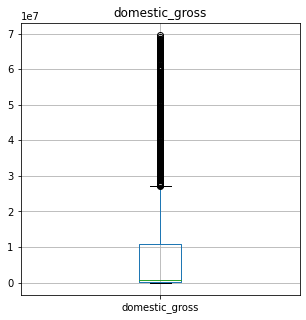

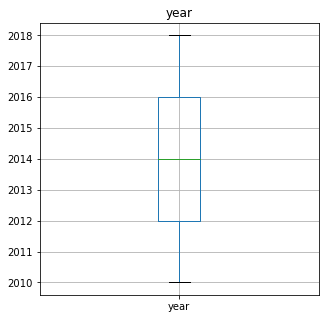

In [21]:
# Use box plot to check
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 5))
        data.boxplot([column])
        plt.title(column)
        plt.show()

# Second Dataset to be cleaned is the one that involves reviews

In [22]:
#Check the information of the data to know the numerical and non numerical data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [23]:
#check the Shape of the data
reviews.shape

(54432, 8)

In [24]:
#Check the columns in the data
reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [25]:
#CHeck the null Values in the dataset
reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [26]:
reviews.dropna(inplace=True)

In [27]:
#Check the null values are eliminated
reviews.isnull().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [28]:
#Check the first 10 rows
reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


In [29]:
# check the statistcal distribution of the  review dataset
reviews.describe()

,id,top_critic
count,33988.000000,33988.000000
mean,1050.648052,0.211163
std,585.403655,0.408140
min,3.000000,0.000000
25%,563.000000,0.000000
50%,1084.000000,0.000000
75%,1545.000000,0.000000
max,2000.000000,1.000000


# The third dataset is on Movies Budget

In [30]:
#Check the shape of the data
budget.shape

(5782, 6)

In [31]:
#Check the null vlaues in the dataset
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [32]:
#Check the dubplicates in the budget data
budget.duplicated().sum()

0

In [33]:
#Check the infor of the data to the numerical and non numerical
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [34]:
#Check the columns in the dataset
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [35]:
#Check the statiscal disribution in the data
budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Outliers for id:
Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []


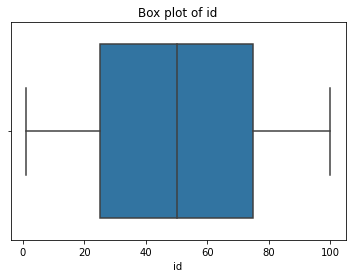

In [36]:
#Check outliers

# Iterate over the columns
for column in budget.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the IQR of the column
    Q1 = budget[column].quantile(0.25)
    Q3 = budget[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outliers
    outliers = budget[(budget[column] < (Q1 - 1.5 * IQR)) | (budget[column] > (Q3 + 1.5 * IQR))]

    # Print the outliers
    print(f"Outliers for {column}:")
    print(outliers)

    # Plot a boxplot of the column
    sns.boxplot(x=budget[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Data Preprocessing and Data Cleaning of the fouth Dataset

In [51]:
#Check the shape of the dataset
movies.shape

(26517, 10)

In [52]:
#Check the null values in the dataset
movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [53]:
#CHeck the duplicates in the dataset
movies.duplicated().sum()

0

In [54]:
#CHeck the columns in the movies datase
movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [56]:
#CHeck the info in the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Merging the  three dataset to be one to enhance data exploation

In [37]:
# Create a new common column 'id' in each dataset
data['id'] = range(1, len(data) + 1)
reviews['id'] = range(1, len(reviews) + 1)
budget['id'] = range(1, len(budget) + 1)


In [38]:
data.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'id'], dtype='object')

In [39]:
reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [40]:
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [41]:

# Merge the datasets on the 'id' column
merged_data = pd.merge(data, reviews, on='id', how='outer')
final_data = pd.merge(merged_data, budget, on='id', how='outer')

# Save the final merged dataset to a CSV file
final_data.to_csv('final_data.csv', index=False)

In [42]:
#Load the final csv file
df=pd.read_csv('final_data.csv')
#Check the first five rows
df.head()

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title,studio,domestic_gross_x,foreign_gross,year,id,review,rating,fresh,critic,top_critic,publisher,date,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,2085.0,205.0,60100000.0,413.0,2010.0,1,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2999.0,215.0,67600000.0,346.0,2010.0,2,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,1037.0,93.0,42800000.0,309.0,2010.0,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,2961.0,36.0,63200000.0,196.0,2010.0,4,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013","May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,2323.0,36.0,42400000.0,85.0,2010.0,5,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013","Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
#Check the number of columns in the dataset
df.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date', 'release_date', 'movie', 'production_budget',
       'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [44]:
#Check the shape of the data
df.shape

(33988, 18)

In [45]:
#Check the null values in the data
df.isnull().sum()

title                31035
studio               31035
domestic_gross_x     31035
foreign_gross        31035
year                 31035
id                       0
review                   0
rating                   0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
release_date         28206
movie                28206
production_budget    28206
domestic_gross_y     28206
worldwide_gross      28206
dtype: int64

In [46]:
#Use mean to perform imputation of the  merged data
# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Perform mean imputation on numeric columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [47]:
# Convert numeric columns to appropriate type and perform mean imputation
numeric_cols = ['production_budget', 'domestic_gross_y', 'worldwide_gross']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values in non-numeric columns with 'Unknown'
non_numeric_cols = ['release_date', 'movie']
for col in non_numeric_cols:
    df[col] = df[col].fillna('Unknown')


In [48]:
# Check the null values in the data again
df.isnull().sum()

title                    0
studio                   0
domestic_gross_x         0
foreign_gross            0
year                     0
id                       0
review                   0
rating                   0
fresh                    0
critic                   0
top_critic               0
publisher                0
date                     0
release_date             0
movie                    0
production_budget    33988
domestic_gross_y     33988
worldwide_gross      33988
dtype: int64

In [49]:
#Drop the three columns since they are empty
df = df.drop(['production_budget', 'domestic_gross_y', 'worldwide_gross'], axis=1)

In [50]:
#Check if the data is clean now without null values
df.isnull().sum()

title               0
studio              0
domestic_gross_x    0
foreign_gross       0
year                0
id                  0
review              0
rating              0
fresh               0
critic              0
top_critic          0
publisher           0
date                0
release_date        0
movie               0
dtype: int64